# Выбор локации для скважины

Добывающей компании нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе найдем месторождения, для каждого определим значения признаков;
- Строим модель и оценивают объём запасов;
- Выбираем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [ ]:
#размер графиков
sns.set(rc={"figure.figsize":(12, 6)})
#темная тема для графиков
plt.style.use('dark_background')

In [ ]:
geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

<b>Описание данных:</b> <br>
id — уникальный идентификатор скважины;<br>
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);<br>
product — объём запасов в скважине (тыс. баррелей)<br>

Создадим функцию чтобы посмотреть данные нащих датасетов

In [ ]:
def research(df):
    df.info()
    sns.distplot(a=df['product'], bins=10, hist=True, kde=False, rug=False)
    plt.title("Гисторгамма запасов нефти по ргеиону")
    plt.xlabel('Объём запасов нефти в скважине (тыс. баррелей)')
    plt.show()

Регион №1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


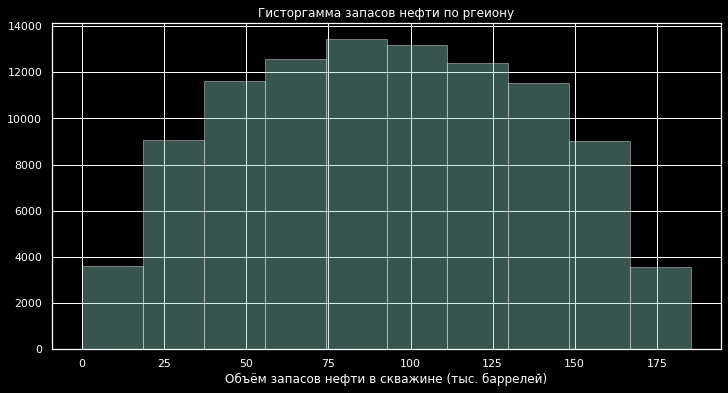

In [ ]:
research(geo_data_0)

Регион №2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


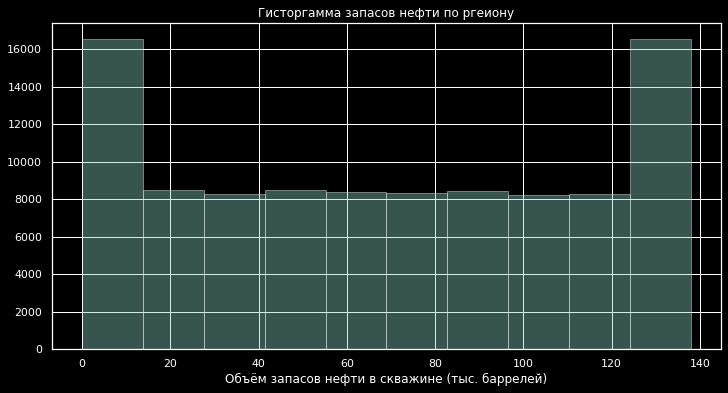

In [ ]:
research(geo_data_1)

Регион №3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


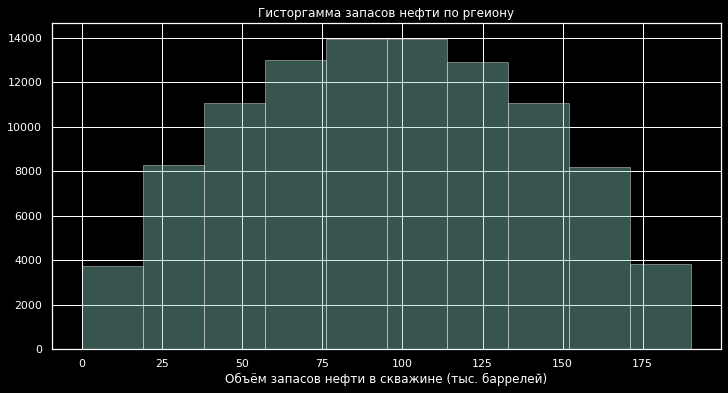

In [ ]:
research(geo_data_2)

**Вывод по разделу:**

Данные загружены. Пропуски отсутствуют. У geo_data_1 не нормальное распределение объёмов запасов

## Обучение и проверка модели

Разделим данные на обучающие и валидационные выборки, обучим моедли, рассчитаем средний запас сырья и RMSE.

In [ ]:
geo_list = [geo_data_0, geo_data_1, geo_data_2]
for i in range(len(geo_list)):
    geo_list[i] = geo_list[i].drop(['id'], axis=1, inplace=True)

In [ ]:
def ml(df, name):
    X = df.drop(['product'], axis=1)
    y = df['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state=12345)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    mse = mean_squared_error(y_valid, predicted_valid)
    rmse = mse ** 0.5
    print("Предсказанный средний запас сырья в регионе", name, ':', predicted_valid.mean(),';', "RMSE =", rmse )
    return (model, predicted_valid, y_valid)

In [ ]:
model_0, predicted_valid_0, y_valid_0 = ml(geo_data_0, '1')

Предсказанный средний запас сырья в регионе 1 : 92.59256778438035 ; RMSE = 37.5794217150813


In [ ]:
model_1, predicted_valid_1, y_valid_1 = ml(geo_data_1, '2')

Предсказанный средний запас сырья в регионе 2 : 68.728546895446 ; RMSE = 0.893099286775617


In [ ]:
model_2, predicted_valid_2, y_valid_2 = ml(geo_data_2, '3')

Предсказанный средний запас сырья в регионе 3 : 94.96504596800489 ; RMSE = 40.02970873393434


<b>Вывод:</b><br>
Тремя моедлями предсказаны средние запасы сырья в трёх регионах. Максималоьное значение в регионе номер 3. В региное номер 2 минимальное среднее значение, но и минимальное знчение корня средней квадратичной ошибки. 

## Подготовка к расчёту прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

In [ ]:
BUDGET = 10**10
INCOME = 450000
BOREHOLES = 200

In [ ]:
limit = BUDGET / (INCOME*BOREHOLES)
print(f'Точка безубыточности {round(limit,2)}')

Точка безубыточности 111.11


Полученное знгачение выше, чем запасы нефти предсказанные моделью.

## Расчёт прибыли и рисков 

Напишеv функцию для расчёта прибыли по предсказаниям модели:

In [ ]:
predicted_valid_0 = pd.Series(predicted_valid_0)
predicted_valid_1 = pd.Series(predicted_valid_1)
predicted_valid_2 = pd.Series(predicted_valid_2)

In [ ]:
y_valid_0 = y_valid_0.reset_index(drop=True)
y_valid_1 = y_valid_1.reset_index(drop=True)
y_valid_2 = y_valid_2.reset_index(drop=True)

In [ ]:
def profit(target, predictions, count):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    return (selected.sum()*INCOME - BUDGET)/10**9

state = np.random.RandomState(12345)
def interval_risk(predictions, target):
    values = []
    for _ in range(1000):
        predictions_subsample = predictions.sample(n=500, replace=True, random_state=state)
        target_subsample = target[predictions_subsample.index]
        values.append(profit(target_subsample, predictions_subsample, 200))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    higher = values.quantile(0.975)
    confidence_interval = st.t.interval(0.95, len(values)-1, loc=values.mean(), scale=values.sem())
    print("Средняя прибыль от 200 лучших скважин:", round(values.mean(), 2), "млрд.руб.")
    print("Доверительный интервал 95%:", confidence_interval, "млрд.руб.")
    print("Квантиль 2.5%", round(lower, 2), "млрд.руб.")
    print("Квантиль 97.5%", round(higher, 2), "млрд.руб.")
    print("Риск:", st.percentileofscore(values, 0), "%")
    return (values.plot(kind='hist', grid=True, bins=15), plt.show())

Регион №1

Средняя прибыль от 200 лучших скважин: 0.43 млрд.руб.
Доверительный интервал 95%: (0.4087322070686986, 0.4431448467524861) млрд.руб.
Квантиль 2.5% -0.1 млрд.руб.
Квантиль 97.5% 0.95 млрд.руб.
Риск: 6.0 %


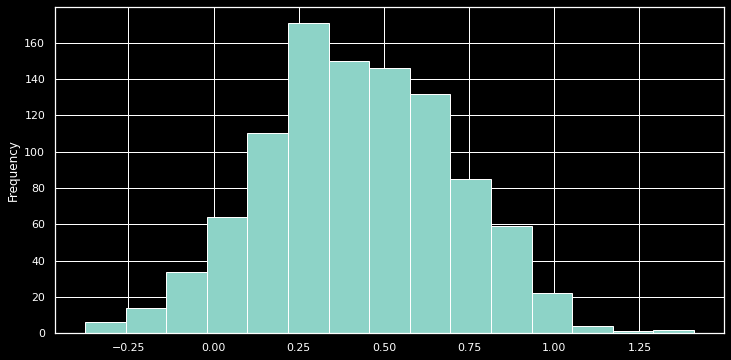

(<matplotlib.axes._subplots.AxesSubplot at 0x7f37dc606150>, None)

In [ ]:
interval_risk(predicted_valid_0, y_valid_0)

Регион №2

Средняя прибыль от 200 лучших скважин: 0.52 млрд.руб.
Доверительный интервал 95%: (0.5052498815766217, 0.531269105818028) млрд.руб.
Квантиль 2.5% 0.13 млрд.руб.
Квантиль 97.5% 0.95 млрд.руб.
Риск: 0.3 %


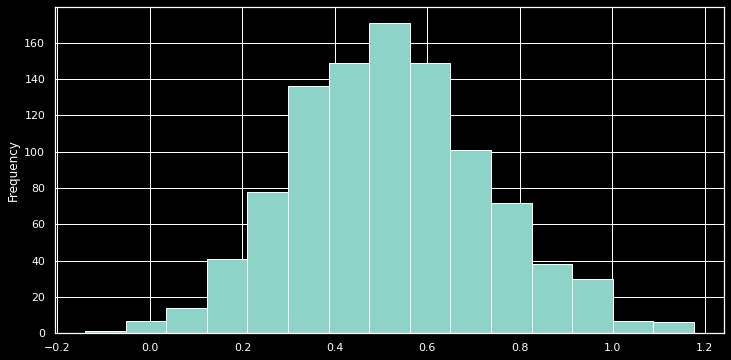

(<matplotlib.axes._subplots.AxesSubplot at 0x7f37de1d3ad0>, None)

In [ ]:
interval_risk(predicted_valid_1, y_valid_1)

Регион №3

Средняя прибыль от 200 лучших скважин: 0.42 млрд.руб.
Доверительный интервал 95%: (0.40252870365036153, 0.4378593070377387) млрд.руб.
Квантиль 2.5% -0.12 млрд.руб.
Квантиль 97.5% 0.99 млрд.руб.
Риск: 6.2 %


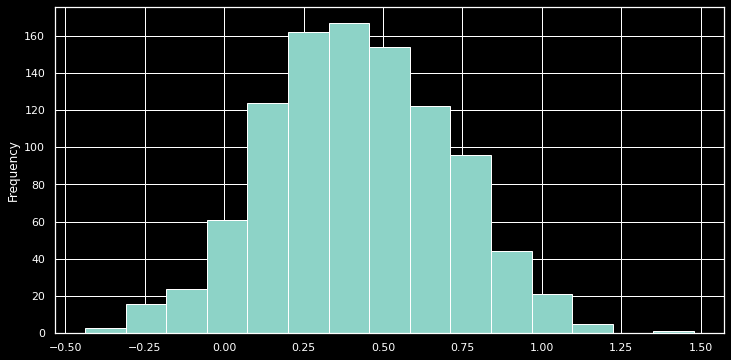

(<matplotlib.axes._subplots.AxesSubplot at 0x7f37ddfa9090>, None)

In [ ]:
interval_risk(predicted_valid_2, y_valid_2)

<b>Вывод:</b><br>

С помощью техники Bootstrap с 1000 выборок, было найдено распределение прибыли.<br>
Определена средняя прибыль, 95%-й доверительный интервал и риск убытков для регионов<br>
Наиболее перспективный регион для разработки скважин №2. У него наилучшая средняя прибыль и минимальный риск 0,3%.